In [13]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [14]:
BATCH_SIZE = 32
Image_width = 240
Image_hight = 320
CHANNELS=3
EPOCHS=50


In [15]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Plants",
    shuffle = True,
    image_size = (Image_width,Image_hight),
    batch_size=BATCH_SIZE
    
)

Found 4000 files belonging to 8 classes.


In [16]:
class_names = dataset.class_names
class_names

['Anthracnose',
 'Bacterial Canker',
 'Cutting Weevil',
 'Die Back',
 'Gall Midge',
 'Healthy',
 'Powdery Mildew',
 'Sooty Mould']

In [17]:
# plt.figure(figsize=(20,10))
# for image_batch, labels_batch in dataset.take(1):
#     for i in range(15):
#         ax = plt.subplot(3,5, i+1)
#         plt.imshow(image_batch[i].numpy().astype("uint8"))
#         plt.title(class_names[labels_batch[i]])
#         plt.axis("off")
#     print(image_batch[0].numpy())
#     print(labels_batch.numpy())
#     plt.imshow(image_batch[0].numpy().astype("unit8"))

In [18]:
len(dataset)


125

In [19]:
 train_size = 0.8
len(dataset)*train_size

100.0

In [20]:
train_ds = dataset.take(100)
len(train_ds)

100

In [21]:
test_ds = dataset.skip(100)
len(test_ds)

25

In [22]:
val_size = 0.1
len(dataset) * val_size

12.5

In [23]:
val_ds = test_ds.take(12)
len(val_ds)

12

In [24]:
test_ds = test_ds.skip(12)
len(test_ds)

13

In [25]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds


In [26]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [27]:
len(train_ds)


100

In [28]:
len(val_ds)


12

In [29]:
len(test_ds)


13

In [30]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [31]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(Image_width, Image_hight),
  layers.Rescaling(1./255),
])

In [32]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [33]:
input_shape = (Image_width, Image_hight, CHANNELS)
n_classes = len(class_names)

model = models.Sequential([
    layers.Input(shape=input_shape),  # Specify input shape using Input layer
    resize_and_rescale,  # Assuming this is a preprocessing layer
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build()

In [34]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 240, 320, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 238, 318, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 119, 159, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 117, 157, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 58, 78, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 76, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 36, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 6, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 179,976 (703.03 KB)

 Trainable params: 179,976 (703.03 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
input_shape = (Image_width, Image_hight, CHANNELS)
n_classes = len(class_names)

model = models.Sequential([
    layers.Input(shape=input_shape),  # Specify input shape using Input layer
    resize_and_rescale,  # Assuming this is a preprocessing layer
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(n_classes, activation='softmax'),
])

model.build()
# Add more layers here as needed

In [36]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 240, 320, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 238, 318, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 119, 159, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 117, 157, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 58, 78, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 56, 76, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 28, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 26, 36, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 13, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 11, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 5, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 6, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 1, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 200,584 (783.53 KB)

 Trainable params: 200,584 (783.53 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.model_selection import KFold
import numpy as np


# Extract images and labels into numpy arrays
images = []
labels = []

for image, label in dataset.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(label)

images = np.array(images)
labels = np.array(labels)

# Define model creation function
def create_model(input_shape, n_classes):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(n_classes, activation='softmax'),
    ])
    return model

# K-Fold Cross Validation
k = 5  # Number of folds
input_shape = (Image_width, Image_hight, CHANNELS)
n_classes = len(dataset.class_names)

kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Train and evaluate model on each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(images, labels)):
    print(f"Fold {fold + 1}")
    
    # Create train and validation sets
    train_images, train_labels = images[train_idx], labels[train_idx]
    val_images, val_labels = images[val_idx], labels[val_idx]
    
    # Convert to TensorFlow datasets
    train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    
  


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


In [38]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [39]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.1801 - loss: 1.9775 - val_accuracy: 0.3338 - val_loss: 1.5592
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.3177 - loss: 1.5713 - val_accuracy: 0.5250 - val_loss: 1.2609
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.4437 - loss: 1.2842 - val_accuracy: 0.6862 - val_loss: 0.8191
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.6098 - loss: 0.9652 - val_accuracy: 0.7387 - val_loss: 0.7434
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.7230 - loss: 0.7473 - val_accuracy: 0.7763 - val_loss: 0.6341
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.7666 - loss: 0.6365 - val_accuracy: 0.8500 - val_loss: 0.4012
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.8368 - loss: 0.4642 - val_accuracy: 0.8788 - val_loss: 0.3466
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.8548 - loss: 0.4064 - val_accu

In [40]:
scores = model.evaluate(test_ds)


13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 557ms/step - accuracy: 0.9799 - loss: 0.0373


In [41]:
history

In [42]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 100}

In [43]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [47]:
#     # Store accuracy for this fold
#     fold_accuracies.append(val_accuracy)

# # Calculate and print average accuracy across all folds
# avg_accuracy = np.mean(fold_accuracies)
# print(f"\nAverage Validation Accuracy across {k} folds: {avg_accuracy:.4f}")

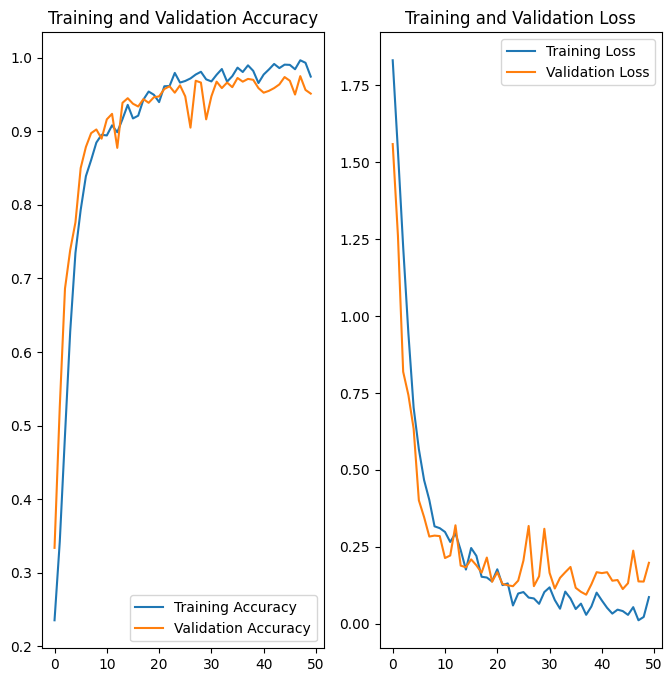

In [48]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

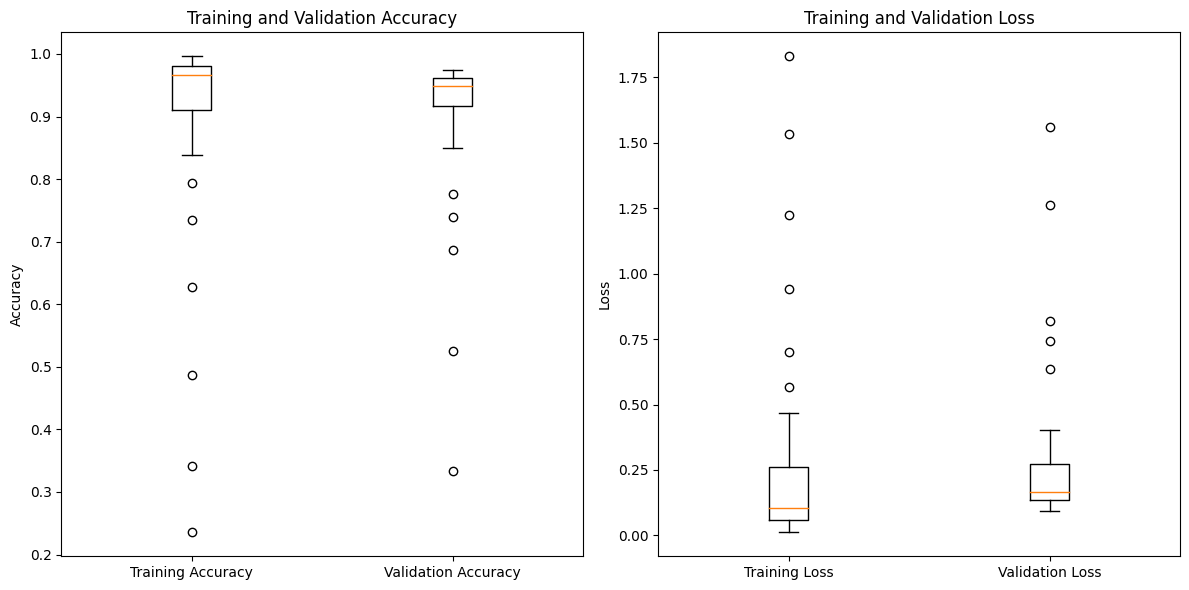

In [49]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
acc_data = [acc, val_acc]
plt.boxplot(acc_data, labels=['Training Accuracy', 'Validation Accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')

# Loss plot  
plt.subplot(1, 2, 2)
loss_data = [loss, val_loss]
plt.boxplot(loss_data, labels=['Training Loss', 'Validation Loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

first image to predict
actual label: Anthracnose
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step
predicted label: Anthracnose


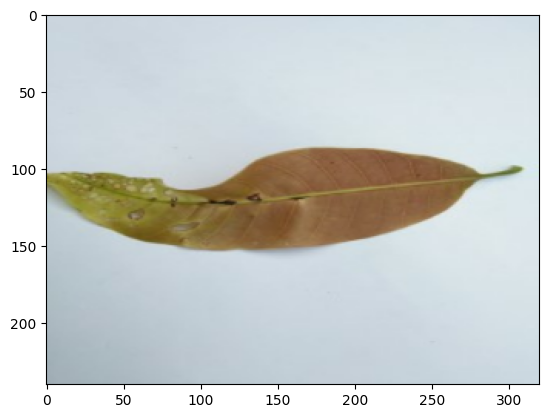

In [50]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [51]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


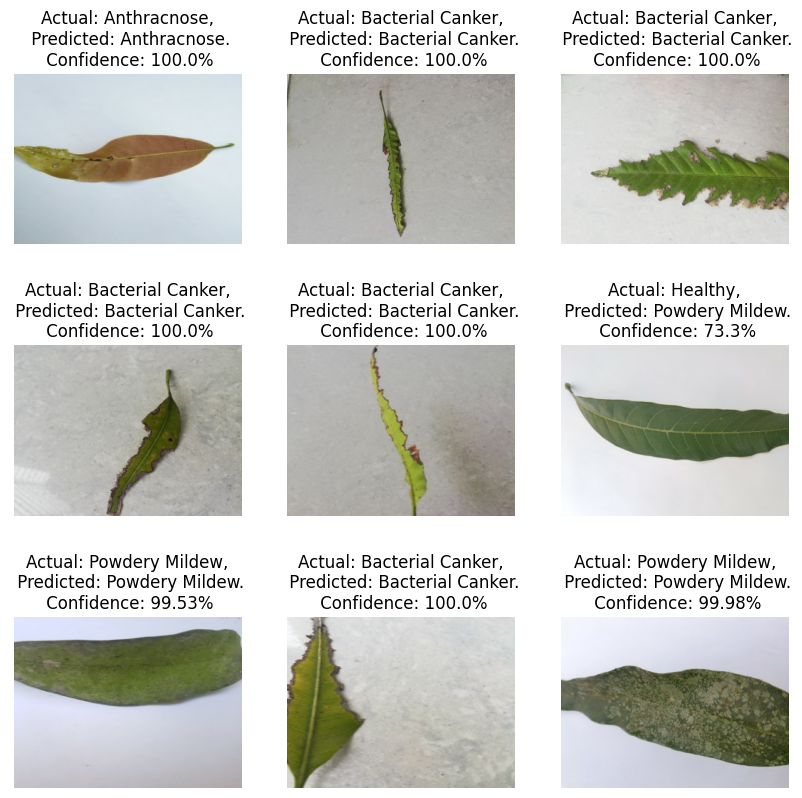

In [52]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [53]:
from sklearn.metrics import confusion_matrix,classification_report


In [54]:
## y_pred = cnn.predict(test_set)
## predicted_categories = tf.argmax(y_pred, axis=1)

In [55]:
# import os
# model_version = max([int(i) for i in os.listdir("../models") + [0]]) + 1
# model.save(f"../models/{model_version}")  

In [56]:
## loaded_model = tf.keras.models.load_model('../saved_models/3')


In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [58]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 2)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [59]:
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(model.parameters(), lr=0.01)

In [60]:
for epoch in range(50):  # loop over the dataset multiple times
    inputs = torch.randn(1, 10)  # random input tensor
    labels = torch.tensor([1])   # target labels

    # Zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    # Backward pass and optimize
    loss.backward()
    optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

Epoch 1, Loss: 0.5443350076675415
Epoch 2, Loss: 0.5735166668891907
Epoch 3, Loss: 0.5059720873832703
Epoch 4, Loss: 0.45392274856567383
Epoch 5, Loss: 0.5779224634170532
Epoch 6, Loss: 0.8582289218902588
Epoch 7, Loss: 0.6348603367805481
Epoch 8, Loss: 0.5094448328018188
Epoch 9, Loss: 1.1515339612960815
Epoch 10, Loss: 0.5035326480865479
Epoch 11, Loss: 0.4658123552799225
Epoch 12, Loss: 0.5187591314315796
Epoch 13, Loss: 0.5043545961380005
Epoch 14, Loss: 0.39674317836761475
Epoch 15, Loss: 0.44812363386154175
Epoch 16, Loss: 0.5849922895431519
Epoch 17, Loss: 0.40465161204338074
Epoch 18, Loss: 0.3899916112422943
Epoch 19, Loss: 0.5472683310508728
Epoch 20, Loss: 0.5167366862297058
Epoch 21, Loss: 0.4690067768096924
Epoch 22, Loss: 0.23738078773021698
Epoch 23, Loss: 0.6201555132865906
Epoch 24, Loss: 0.5281842947006226
Epoch 25, Loss: 0.6674582362174988
Epoch 26, Loss: 0.6041761636734009
Epoch 27, Loss: 0.3820442855358124
Epoch 28, Loss: 0.3518349826335907
Epoch 29, Loss: 0.431386

In [61]:
import torch
import torch.nn as nn

class SparseNN(nn.Module):
    def __init__(self, input_size):
        super(SparseNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, 1)
        self.activation = nn.ReLU()
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.output_activation(self.fc2(x))
        return x

In [62]:
def predict(cnn, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = cnn.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [63]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

class ImprovedSparseNN(nn.Module):
    def __init__(self, input_size):
        super(ImprovedSparseNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x.float())

def generate_structured_data(n=5000, d=100, sparsity=0.9, seed=42):
    np.random.seed(seed)
    
    # Generate sparse features
    X = np.random.rand(n, d) < (1 - sparsity)
    X = X.astype(float)
    
    # Create structured relationships
    # Use combinations of features to determine the output
    important_features = np.random.choice(d, size=5, replace=False)
    feature_weights = np.random.uniform(-1, 1, size=5)
    
    # Create a weighted sum of important features
    y_score = np.zeros(n)
    for feat, weight in zip(important_features, feature_weights):
        y_score += X[:, feat] * weight
    
    # Add some non-linear relationships
    y_score += np.sum(X[:, important_features[:2]] * X[:, important_features[2:4]], axis=1)
    
    # Convert to binary labels with some noise
    y = (y_score > np.median(y_score)).astype(int)
    
    return X, y

def train_and_evaluate(model, optimizer, criterion, train_loader, val_loader, test_loader, 
                      num_epochs=200, patience=20):
    losses = []
    val_accuracies = []
    best_val_acc = 0
    best_model = None
    patience_counter = 0
    
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', 
                                                    factor=0.5, patience=10, verbose=True)
    
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        num_batches = 0
        
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets.unsqueeze(1).float())
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            epoch_loss += loss.item()
            num_batches += 1
        
        # Validation phase
        model.eval()
        val_acc = evaluate_model(model, val_loader)
        val_accuracies.append(val_acc)
        
        # Learning rate scheduling
        scheduler.step(val_acc)
        
        # Early stopping check
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
            
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            model.load_state_dict(best_model)
            break
            
        avg_loss = epoch_loss / num_batches
        losses.append(avg_loss)
        
        if epoch % 20 == 0:
            print(f"Epoch {epoch}, Loss: {avg_loss:.4f}, Val Acc: {val_acc:.4f}")
    
    # Evaluate on test set
    model.eval()
    test_acc = evaluate_model(model, test_loader)
    
    return losses, val_accuracies, test_acc

def evaluate_model(model, loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in loader:
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets.unsqueeze(1).float()).sum().item()
    return correct / total

# Generate dataset
X, y = generate_structured_data()
input_size = X.shape[1]

# Split data
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))
X_train = X[:train_size]
y_train = y[:train_size]
X_val = X[train_size:train_size+val_size]
y_val = y[train_size:train_size+val_size]
X_test = X[train_size+val_size:]
y_test = y[train_size+val_size:]

# Create data loaders
train_dataset = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
val_dataset = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_dataset = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

# Optimizer configurations

adam_learning_rates = [0.001, 0.005, 0.0005]

# Optimizer configurations with additional Adam learning rates
optimizer_configs = {
    'Adagrad': lambda m: optim.Adagrad(m.parameters(), lr=0.01, weight_decay=1e-5),
    'SGD': lambda m: optim.SGD(m.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-5),
    'Adam_0.001': lambda m: optim.Adam(m.parameters(), lr=0.001, weight_decay=1e-5),
    'Adam_0.005': lambda m: optim.Adam(m.parameters(), lr=0.005, weight_decay=1e-5),
    'Adam_0.0005': lambda m: optim.Adam(m.parameters(), lr=0.0005, weight_decay=1e-5),
    'RMSprop': lambda m: optim.RMSprop(m.parameters(), lr=0.001, alpha=0.99, weight_decay=1e-5)
}

# Run experiments
results = {}
for name, opt_constructor in optimizer_configs.items():
    print(f"\nTraining with {name}...")
    model = ImprovedSparseNN(input_size)
    optimizer = opt_constructor(model)
    criterion = nn.BCELoss()
    
    losses, val_accuracies, test_acc = train_and_evaluate(
        model, optimizer, criterion, train_loader, val_loader, test_loader
    )
    
    results[name] = {
        'losses': losses,
        'val_accuracies': val_accuracies,
        'test_accuracy': test_acc
    }

# Print final results
print("\nFinal Test Accuracies:")
for name, data in results.items():
    print(f"{name}: {data['test_accuracy']:.4f}")




Training with Adagrad...
Epoch 0, Loss: 0.2576, Val Acc: 0.9707
Epoch 20, Loss: 0.0139, Val Acc: 0.9827
Epoch 00037: reducing learning rate of group 0 to 5.0000e-03.
Epoch 40, Loss: 0.0072, Val Acc: 0.9853
Early stopping at epoch 45

Training with SGD...
Epoch 0, Loss: 0.3213, Val Acc: 0.9027
Epoch 20, Loss: 0.0121, Val Acc: 0.9893
Epoch 00041: reducing learning rate of group 0 to 5.0000e-03.
Epoch 40, Loss: 0.0044, Val Acc: 0.9987
Early stopping at epoch 49

Training with Adam_0.001...
Epoch 0, Loss: 0.4683, Val Acc: 0.9560
Epoch 20, Loss: 0.0068, Val Acc: 0.9907
Epoch 00026: reducing learning rate of group 0 to 5.0000e-04.
Early stopping at epoch 34

Training with Adam_0.005...
Epoch 0, Loss: 0.2179, Val Acc: 0.9720
Epoch 20, Loss: 0.0039, Val Acc: 0.9973
Epoch 00032: reducing learning rate of group 0 to 2.5000e-03.
Epoch 40, Loss: 0.0016, Val Acc: 0.9987
Epoch 00055: reducing learning rate of group 0 to 1.2500e-03.
Epoch 60, Loss: 0.0002, Val Acc: 0.9973
Early stopping at epoch 63


In [64]:
optimizer_configs = {
    'Adam': lambda m: optim.Adam(m.parameters(), lr=0.0003, weight_decay=1e-5)
}

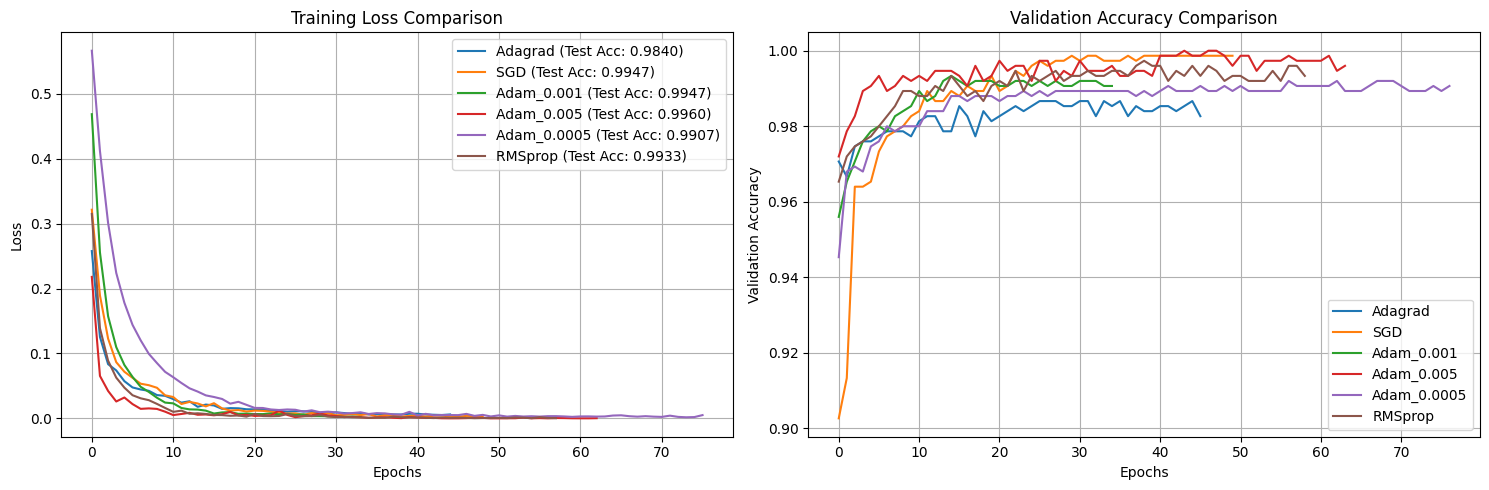

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Plot training loss
plt.subplot(1, 2, 1)
for name, data in results.items():
    plt.plot(data['losses'], label=f"{name} (Test Acc: {data['test_accuracy']:.4f})")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)

# Plot validation accuracy
plt.subplot(1, 2, 2)
for name, data in results.items():
    plt.plot(data['val_accuracies'], label=name)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

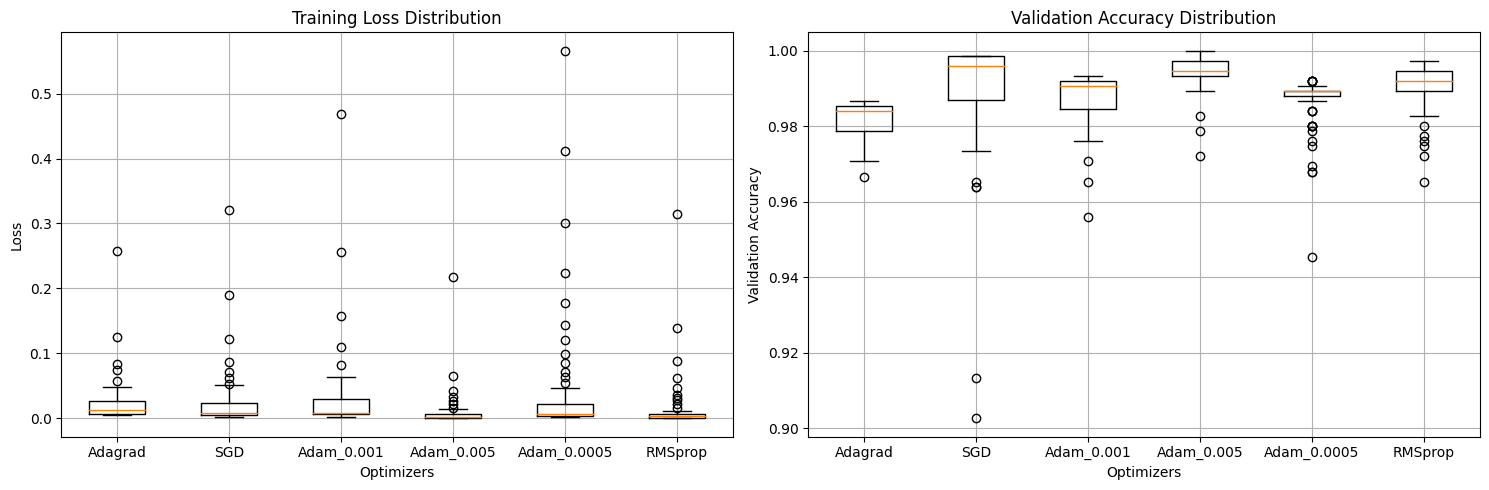

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Extract losses and accuracies for each optimizer (or configuration)
losses_data = [data['losses'] for name, data in results.items()]
accuracies_data = [data['val_accuracies'] for name, data in results.items()]
optimizer_names = list(results.keys())

# Plot box plot for training losses
plt.subplot(1, 2, 1)
plt.boxplot(losses_data, labels=optimizer_names)
plt.xlabel('Optimizers')
plt.ylabel('Loss')
plt.title('Training Loss Distribution')
plt.grid(True)

# Plot box plot for validation accuracies
plt.subplot(1, 2, 2)
plt.boxplot(accuracies_data, labels=optimizer_names)
plt.xlabel('Optimizers')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Distribution')
plt.grid(True)

plt.tight_layout()
plt.show()


In [67]:
from sklearn.model_selection import KFold

def k_fold_cross_validation(model_class, optimizer_constructor, criterion, X, y, k=5, num_epochs=200, patience=20):
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_results = []
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X)):
        print(f"\nStarting fold {fold + 1}/{k}...")
        
        # Prepare data for this fold
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]
        
        train_dataset = TensorDataset(torch.from_numpy(X_train_fold), torch.from_numpy(y_train_fold))
        val_dataset = TensorDataset(torch.from_numpy(X_val_fold), torch.from_numpy(y_val_fold))
        
        train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=64)
        
        # Initialize model, optimizer
        model = model_class(input_size)
        optimizer = optimizer_constructor(model)
        
        # Train and evaluate model on this fold
        losses, val_accuracies, test_acc = train_and_evaluate(
            model, optimizer, criterion, train_loader, val_loader, test_loader, 
            num_epochs=num_epochs, patience=patience
        )
        
        # Store results for this fold
        fold_results.append(test_acc)
        print(f"Fold {fold + 1} Test Accuracy: {test_acc:.4f}")
    
    # Average results across all folds
    avg_test_acc = sum(fold_results) / len(fold_results)
    print(f"\nAverage Test Accuracy across {k} folds: {avg_test_acc:.4f}")
    return fold_results, avg_test_acc

# Run k-fold cross-validation for each optimizer
k = 5  # Number of folds
all_results = {}
for name, opt_constructor in optimizer_configs.items():
    print(f"\nPerforming k-fold cross-validation with {name} optimizer...")
    fold_results, avg_test_acc = k_fold_cross_validation(
        ImprovedSparseNN, opt_constructor, nn.BCELoss(), X, y, k=k, num_epochs=200, patience=20
    )
    all_results[name] = {
        'fold_accuracies': fold_results,
        'average_test_accuracy': avg_test_acc
    }

# Print k-fold cross-validation results
print("\nK-Fold Cross-Validation Results:")
for name, data in all_results.items():
    print(f"{name} - Fold Accuracies: {data['fold_accuracies']}, Average Test Accuracy: {data['average_test_accuracy']:.4f}")




Performing k-fold cross-validation with Adam optimizer...

Starting fold 1/5...
Epoch 0, Loss: 0.7119, Val Acc: 0.6890
Epoch 20, Loss: 0.0388, Val Acc: 0.9880
Epoch 00041: reducing learning rate of group 0 to 1.5000e-04.
Epoch 40, Loss: 0.0116, Val Acc: 0.9920
Epoch 00055: reducing learning rate of group 0 to 7.5000e-05.
Epoch 60, Loss: 0.0055, Val Acc: 0.9940
Early stopping at epoch 63
Fold 1 Test Accuracy: 0.9973

Starting fold 2/5...
Epoch 0, Loss: 0.6304, Val Acc: 0.7780
Epoch 20, Loss: 0.0368, Val Acc: 0.9880
Epoch 40, Loss: 0.0096, Val Acc: 0.9950
Epoch 00053: reducing learning rate of group 0 to 1.5000e-04.
Epoch 60, Loss: 0.0038, Val Acc: 0.9970
Epoch 00067: reducing learning rate of group 0 to 7.5000e-05.
Early stopping at epoch 75
Fold 2 Test Accuracy: 1.0000

Starting fold 3/5...
Epoch 0, Loss: 0.5936, Val Acc: 0.9120
Epoch 20, Loss: 0.0362, Val Acc: 0.9850
Epoch 40, Loss: 0.0071, Val Acc: 0.9910
Epoch 00054: reducing learning rate of group 0 to 1.5000e-04.
Epoch 60, Loss: 

In [74]:
save_dir = r"C:\!college project\Traning"

In [76]:
import os

# Create directory to save models if it doesn't exist
os.makedirs(save_dir, exist_ok=True)


In [78]:
# Define the save directory with proper escaping
save_dir = r"C:\!college project\Traning"

# Save the model for each fold in cross-validation
model_save_path = os.path.join(save_dir, f"model_fold_{fold + 1}.h5")
model.save(model_save_path)
print(f"Model for fold {fold + 1} saved at {model_save_path}")


AttributeError: 'ImprovedSparseNN' object has no attribute 'save'